In [1]:
img_path = "/aiffel/aiffel/AAAPrac/TON/2530_AV.png"
tsv_path = "/aiffel/aiffel/AAAPrac/TON/physionet.org/files/circor-heart-sound/1.0.3/new_data1/2530_AV.tsv"

In [2]:
import pandas as pd

df = pd.read_csv(tsv_path, sep='\t', header=None, names=['xmin', 'xmax', 'label_ind'])
df

,xmin,xmax,label_ind
0,0.000000,0.158176,1
1,0.158176,0.255088,2
2,0.255088,0.378176,3
3,0.378176,0.538176,4
4,0.538176,0.678176,1
...,...,...,...
64,8.858176,8.978176,1
65,8.978176,9.138176,2
66,9.138176,9.218176,3
67,9.218176,9.478176,4


이미지 너비: 1240px
이미지 높이: 369px


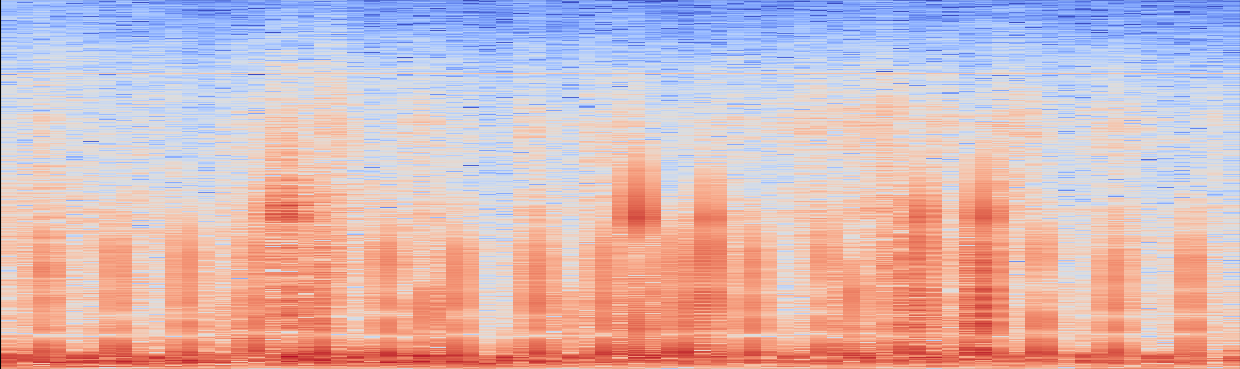

In [3]:
from PIL import Image
image = Image.open(img_path)
width, height = image.size
# 이미지 크기 출력
print(f'이미지 너비: {width}px')
print(f'이미지 높이: {height}px')

# 이미지 표시 (선택사항)
image.show()

In [4]:
df['ymin'] = 0
df['ymax'] = 369
df['xmin'] = 124*df['xmin']
df['xmax'] = 124*df['xmax']

In [5]:
df

,xmin,xmax,label_ind,ymin,ymax
0,0.000000,19.613824,1,0,369
1,19.613824,31.630912,2,0,369
2,31.630912,46.893824,3,0,369
3,46.893824,66.733824,4,0,369
4,66.733824,84.093824,1,0,369
...,...,...,...,...,...
64,1098.413824,1113.293824,1,0,369
65,1113.293824,1133.133824,2,0,369
66,1133.133824,1143.053824,3,0,369
67,1143.053824,1175.293824,4,0,369


In [13]:
df[df['label_ind']==3]

,xmin,xmax,label_ind,ymin,ymax
2,31.630912,46.893824,3,0,369
6,101.453824,118.813824,3,0,369
10,168.413824,183.293824,3,0,369
14,232.893824,245.293824,3,0,369
18,297.373824,312.253824,3,0,369
22,361.853824,376.733824,3,0,369
26,428.813824,446.173824,3,0,369
30,505.693824,520.573824,3,0,369
34,567.693824,582.573824,3,0,369
38,637.133824,652.013824,3,0,369


이미지 너비: 1240px
이미지 높이: 369px


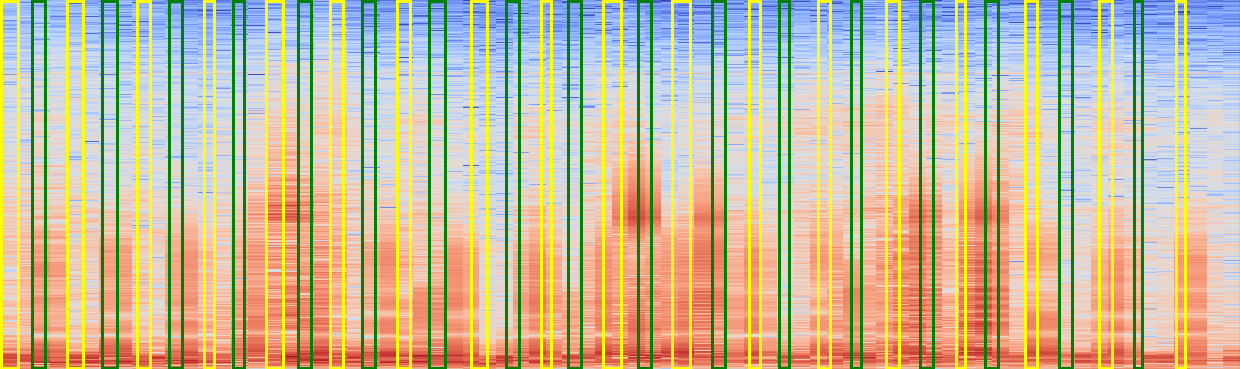

In [20]:
from PIL import Image, ImageDraw

image = Image.open(img_path)
width, height = image.size
# 이미지 크기 출력
print(f'이미지 너비: {width}px')
print(f'이미지 높이: {height}px')

# 필터링: label_ind가 1 또는 3인 경우에만 bbox 그리기
filtered_df = df[df['label_ind'].isin([1, 3])]

# Bounding Box 그리기
draw = ImageDraw.Draw(image)
for index, row in filtered_df.iterrows():
    bbox = {
        'xmin': int(row['xmin']),
        'ymin': int(row['ymin']),
        'xmax': int(row['xmax']),
        'ymax': int(row['ymax'])
    }
    if row['label_ind'] == 1:
        # 노란색으로 그리기
        draw.rectangle([bbox['xmin'], bbox['ymin'], bbox['xmax'], bbox['ymax']], outline='yellow', width=3)
    elif row['label_ind'] == 3:
        # 초록색으로 그리기
        draw.rectangle([bbox['xmin'], bbox['ymin'], bbox['xmax'], bbox['ymax']], outline='green', width=3)

# 이미지 표시
image.show()

In [21]:
root = "/aiffel/aiffel/AAAPrac/TON/physionet.org/files/circor-heart-sound/1.0.3/new_data1/"

In [22]:
import glob

files = sorted(glob.glob(root + '**/*.tsv', recursive=True))
print(len(files))
print(files[0])

3163
/aiffel/aiffel/AAAPrac/TON/physionet.org/files/circor-heart-sound/1.0.3/new_data1/13918_AV.tsv


In [23]:
for file in files:
    save_path = file.replace("new_data1", "new_data3")
    df = pd.read_csv(file, sep='\t', header=None, names=['xmin', 'xmax', 'label_ind'])
    
    df['ymin'] = 0
    df['ymax'] = 369
    df['xmin'] = 124*df['xmin']
    df['xmax'] = 124*df['xmax']
    
    df = df[['xmin', 'ymin', 'xmax', 'ymax', 'label_ind']]
    
    df.to_csv(save_path, sep='\t', header=False, index=False)
    print('완료')


완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완

완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완료
완

In [24]:
import shutil

# 폴더를 압축할 경로
folder_to_compress = '/aiffel/aiffel/AAAPrac/TON/physionet.org/files/circor-heart-sound/1.0.3/new_data3'

# 압축 파일의 이름
output_zip_file = '/aiffel/aiffel/AAAPrac/TON/physionet.org/files/circor-heart-sound/1.0.3/new_tsv3.zip'

# shutil.make_archive를 사용하여 폴더를 압축
shutil.make_archive(output_zip_file, 'zip', folder_to_compress)

print(f'폴더가 압축되었습니다: {output_zip_file}')


폴더가 압축되었습니다: /aiffel/aiffel/AAAPrac/TON/physionet.org/files/circor-heart-sound/1.0.3/new_tsv3.zip


## 확인

이미지 너비: 1240px
이미지 높이: 369px


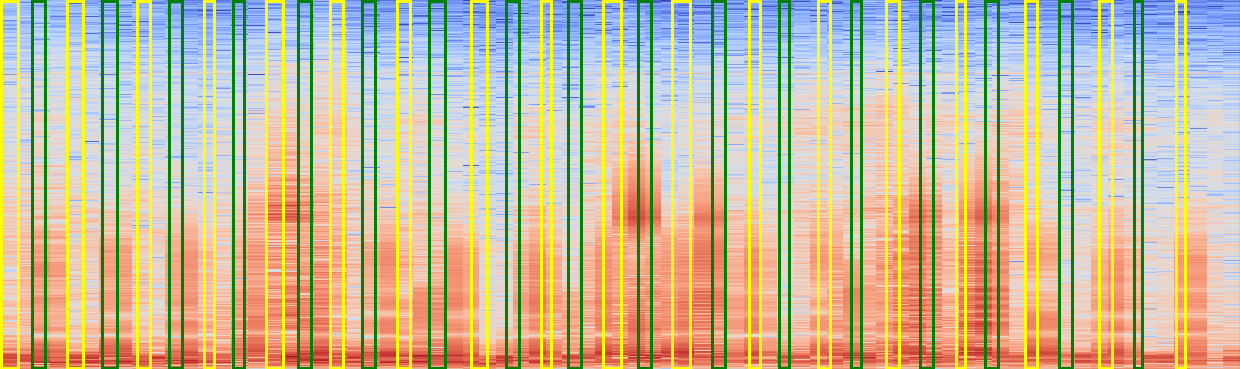

In [26]:

import pandas as pd

tsv_path = "/aiffel/aiffel/AAAPrac/TON/physionet.org/files/circor-heart-sound/1.0.3/new_data3/2530_AV.tsv"
df = pd.read_csv(tsv_path, sep='\t', header=None, names=['xmin', 'ymin', 'xmax', 'ymax', 'label_ind'])

from PIL import Image, ImageDraw

image = Image.open(img_path)
width, height = image.size
# 이미지 크기 출력
print(f'이미지 너비: {width}px')
print(f'이미지 높이: {height}px')

# 필터링: label_ind가 1 또는 3인 경우에만 bbox 그리기
filtered_df = df[df['label_ind'].isin([1, 3])]

# Bounding Box 그리기
draw = ImageDraw.Draw(image)
for index, row in filtered_df.iterrows():
    bbox = {
        'xmin': int(row['xmin']),
        'ymin': int(row['ymin']),
        'xmax': int(row['xmax']),
        'ymax': int(row['ymax'])
    }
    if row['label_ind'] == 1:
        # 노란색으로 그리기
        draw.rectangle([bbox['xmin'], bbox['ymin'], bbox['xmax'], bbox['ymax']], outline='yellow', width=3)
    elif row['label_ind'] == 3:
        # 초록색으로 그리기
        draw.rectangle([bbox['xmin'], bbox['ymin'], bbox['xmax'], bbox['ymax']], outline='green', width=3)

# 이미지 표시
image.show()